In [1]:
#ML-NA-Day2-D29092020 and Day3-D30092020

In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [3]:
X=np.array([[1,0],[1,1],[1,3]])

In [4]:
X

array([[1, 0],
       [1, 1],
       [1, 3]])

In [5]:
Y=np.array([1,2,2])

In [6]:
Y

array([1, 2, 2])

In [7]:
#inv(XTX) XTY

In [8]:
XTX = np.dot((X.T),X)

In [9]:
XTX

array([[ 3,  4],
       [ 4, 10]])

In [10]:
np.linalg.inv(XTX)

array([[ 0.71428571, -0.28571429],
       [-0.28571429,  0.21428571]])

In [11]:
XTY=np.dot(X.T,Y)

In [12]:
XTY

array([5, 8])

In [13]:
theta=np.dot(np.linalg.inv(XTX),XTY)

In [14]:
theta

array([1.28571429, 0.28571429])

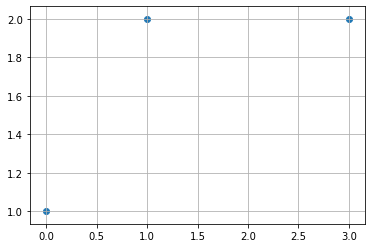

In [15]:
plt.scatter(X[:,1],Y)
plt.grid()
plt.show()

In [16]:
predict = np.dot(X,theta)

In [17]:
predict

array([1.28571429, 1.57142857, 2.14285714])

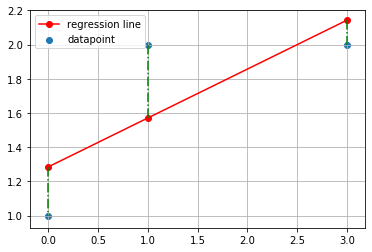

In [18]:
plt.plot(X[:,1],predict,marker='o',c='red',label='regression line')
plt.scatter(X[:,1],Y,label='datapoint')
plt.grid()
plt.legend(loc='best')
plt.plot([X[:,1][0],X[:,1][0]],[predict[0],Y[0]],c='g',linestyle='-.')
plt.plot([X[:,1][1],X[:,1][1]],[predict[1],Y[1]],c='g',linestyle='-.')
plt.plot([X[:,1][2],X[:,1][2]],[predict[2],Y[2]],c='g',linestyle='-.')
plt.show()

In [19]:
X=np.array([[5,6,8],[2,4,9],[9,7,3],[8,4,9]])


In [20]:
X

array([[5, 6, 8],
       [2, 4, 9],
       [9, 7, 3],
       [8, 4, 9]])

In [21]:
X

array([[5, 6, 8],
       [2, 4, 9],
       [9, 7, 3],
       [8, 4, 9]])

In [22]:
idx_1 = np.random.choice(range(X.shape[0]),3,replace=False)


In [23]:
idx_1

array([1, 2, 0])

In [24]:
idx_2=np.setdiff1d(np.arange(0,X.shape[0]),idx_1)

In [25]:
idx_2

array([3])

In [26]:
X1=X[idx_1,:]
X2=X[idx_2,:]

In [27]:
X1

array([[2, 4, 9],
       [9, 7, 3],
       [5, 6, 8]])

In [28]:
X2

array([[8, 4, 9]])

In [ ]:
#Day3 - D30092020

In [29]:
import pandas as pd

In [30]:
data=pd.read_csv('test_data_housing.txt')

In [31]:
data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


In [32]:
df=data.copy()

In [34]:
df.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,1,two,yes,no,no,no,yes,1,no


In [36]:
df.shape

(546, 12)

In [37]:
#no of record
m=df.shape[0]

In [41]:
train_size = 0.8
train_count = int(train_size *m)
test_count = m - train_count

In [44]:
df_shuffled=df.sample(m)

In [46]:
df_train=df_shuffled.iloc[:train_count,:]
df_test =df_shuffled.iloc[train_count:,:]

In [48]:
df_train.shape

(436, 12)

In [49]:
df_test.shape

(110, 12)

In [50]:
df.columns
df.driveway=pd.get_dummies(df.driveway)
df.recroom=pd.get_dummies(df.recroom)
df.fullbase=pd.get_dummies(df.fullbase)
df.gashw=pd.get_dummies(df.gashw)
df.airco=pd.get_dummies(df.airco)
df.prefarea=pd.get_dummies(df.prefarea)

# Check if all the categorical variables are converted to dummies
df
stories_category=pd.get_dummies(df.stories,prefix='stories')
stories_category

# Concatenate the stories categorical columns at the right of the dataframe
df=pd.concat([df,stories_category],axis=1)
df.drop('stories',axis=1,inplace=True)
df.columns
df
feature=list(df.columns[1:])
feature

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [51]:
df

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,0,1,0,1,1,1,1,0,0,0,1
1,38500.0,4000,2,1,0,1,1,1,1,0,1,0,1,0,0
2,49500.0,3060,3,1,0,1,1,1,1,0,1,0,1,0,0
3,60500.0,6650,3,1,0,0,1,1,1,0,1,0,0,0,1
4,61000.0,6360,2,1,0,1,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,0,0,1,1,0,0,1,1,0,0,0
542,94000.0,6000,3,2,0,1,1,1,0,0,1,1,0,0,0
543,103000.0,6000,3,2,0,0,1,1,0,1,1,1,0,0,0
544,105000.0,6000,3,2,0,0,1,1,0,1,1,0,0,0,1


In [52]:
def standardize(x):
    std=x.std()
    mu=x.mean()
    out=(x-mu)/std
    return(out,mu,std)

In [54]:
df.price,price_mean, price_std = standardize(df.price)

In [55]:
df

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,-0.978239,5850,3,1,0,1,0,1,1,1,1,0,0,0,1
1,-1.109312,4000,2,1,0,1,1,1,1,0,1,0,1,0,0
2,-0.697368,3060,3,1,0,1,1,1,1,0,1,0,1,0,0
3,-0.285425,6650,3,1,0,0,1,1,1,0,1,0,0,0,1
4,-0.266700,6360,2,1,0,1,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,0.875508,4800,3,2,0,0,1,1,0,0,1,1,0,0,0
542,0.969132,6000,3,2,0,1,1,1,0,0,1,1,0,0,0
543,1.306177,6000,3,2,0,0,1,1,0,1,1,1,0,0,0
544,1.381075,6000,3,2,0,0,1,1,0,1,1,0,0,0,1


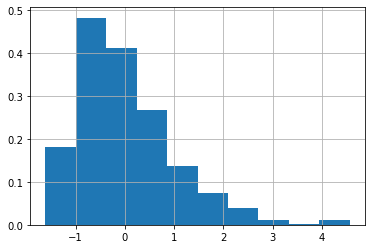

In [57]:
#df.price.hist()
df.price.hist(density=True)

In [59]:
df.lotsize, lotsize_mean, lotsize_std=standardize(df.lotsize)

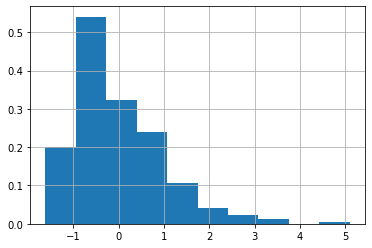

In [61]:
df.lotsize.hist(density=True)

In [64]:
X=df[feature]

In [67]:
y=df.price

In [68]:
y

0     -0.978239
1     -1.109312
2     -0.697368
3     -0.285425
4     -0.266700
         ...   
541    0.875508
542    0.969132
543    1.306177
544    1.381075
545    1.381075
Name: price, Length: 546, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X=X.values

In [75]:
y=y.values

In [76]:
X.shape

(546, 14)

In [77]:
y.shape

(546,)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=123)

In [80]:
X_train.shape

(436, 14)

In [81]:
y_train.shape

(436,)

In [82]:
X_test.shape

(110, 14)

In [83]:
y_test.shape

(110,)

In [85]:
m=X_train.shape[0]
n=X_train.shape[1]

In [86]:
print(m,n)

436 14


In [ ]:
y_train=np.reshape(y_train,(-1,1)) #  -1, one column

In [ ]:
#Y=X*Theta + Beta
#X = (m,n); Theta =(n,1); beta = scalar; Y=(m,1)
#del_J/beta = ((predict - y)/m).sum()
#del_J/theta = X.T(predict - y)/m

In [121]:
#1
Theta = np.zeros((n,1))
Beta = 0

In [122]:
Theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [123]:
Beta

0

In [124]:
y_train.shape

(436, 1)

In [125]:

J_total = []
iteration = 500
alpha=0.1

for i in range(iteration):
    y_predict = np.dot(X_train,Theta) + Beta 
    Error  = (y_train - y_predict) # (m,1).T = (1,m) * (m,1) = Scalar 
    Error_square = np.dot(Error.T, Error)
    J = ((Error_square)/(2*m)).squeeze()
    J_total.append(J)
    ##
    Del_theta = (1/m) * np.dot(X_train.T,(y_predict - y_train))
    Del_beta  = (1/m) *(y_predict - y_train).sum()
    ##
    Theta = Theta - alpha*Del_theta
    Beta = Beta - alpha*Del_beta

In [ ]:
#y = mx + c
#y_hat = X*Theta + Beta

In [126]:
Theta

array([[ 0.27933989],
       [ 0.14387516],
       [ 0.50179885],
       [-0.19792547],
       [-0.22415831],
       [-0.17237233],
       [-0.27860985],
       [-0.44073817],
       [ 0.17309415],
       [-0.3467854 ],
       [ 0.39756901],
       [-0.3087346 ],
       [ 0.14769303],
       [-0.12507939]])

In [127]:
Beta

0.11144804496254633

In [133]:
J_total[-1]

array(0.16916615)

In [134]:
J_total[-2]

array(0.16916803)

In [135]:
J_total[-2] - J_total[-1] # Epsilon -> 0 # slop does not change 

1.8721933931209467e-06

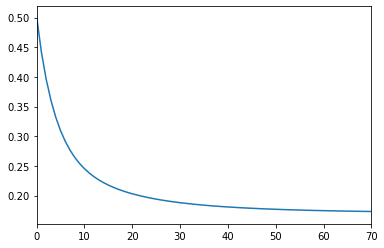

In [136]:
plt.plot(J_total)
plt.xlim(0,70)
plt.show()

In [142]:
y_train_hat = np.dot(X_train,Theta) + Beta
y_predict   = np.dot(X_test, Theta )+ Beta

In [146]:
MSE =((y_train - y_train_hat)**2).sum()/y_train.shape[0]
MAE =(np.abs(y_train - y_train_hat)).sum()/y_train.shape[0]
SSE = ((y_train - y_train_hat)**2).sum() #Sum of squared residual/sum of sqaured error
SST = ((y_train - y_train.mean())**2).sum() #
SSR = ((y_train_hat - y_train.mean())**2).sum() # Sum squared regression

R_square = SSR/SST

In [147]:
MSE

0.33832857239276626

In [148]:
MAE

0.43094675346321987

In [149]:
SSE

147.5112575632461

In [150]:
SST

437.734086317112

In [151]:
SSR

289.12738339989386

In [152]:
R_square

0.6605091822582866

In [153]:
1-SSE/SST

0.6630117183600295

In [160]:
R_square_adj=1-(1-R_square)*(m-1)/(m-n-1)

In [161]:
R_square_adj

0.6492197013832652

In [157]:
plt.scatter(X_train[:,0])

14

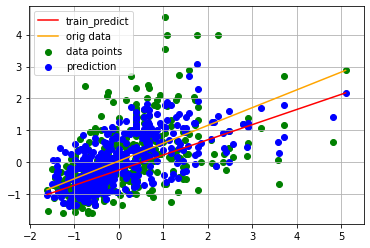

In [164]:
plt.scatter(X_train[:,0],y_train,color='g',label='data points') #lotsize and price
plt.scatter(X_train[:,0],y_train_hat,color='b',label='prediction')
xmin_idx =np.argmin(X_train[:,0])
xmax_idx =np.argmax(X_train[:,0])
ymin = np.dot(X_train[xmin_idx],Theta) + Beta
ymax = np.dot(X_train[xmax_idx],Theta) + Beta
plt.plot([X_train[xmin_idx][0],X_train[xmax_idx][0]],[ymin[0],ymax[0]],c='r',label='train_predict')
plt.plot([X_train[xmin_idx][0],X_train[xmax_idx][0]],[y_train[xmin_idx],y_train[xmax_idx]],c='orange',label='orig data')


plt.grid()
plt.legend()
plt.show()


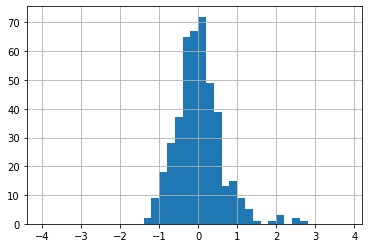

In [168]:
plt.hist(y_train.squeeze() - y_train_hat.squeeze(),bins=np.arange(-4,4,0.2))
plt.grid(True)
plt.show()

In [170]:
p=X_train[:,0]
l=X_train[:,1]
b=X_train[:,2]

In [171]:
from mpl_toolkits.mplot3d import Axes3D


In [172]:
%matplotlib notebook

<IPython.core.display.Javascript object>


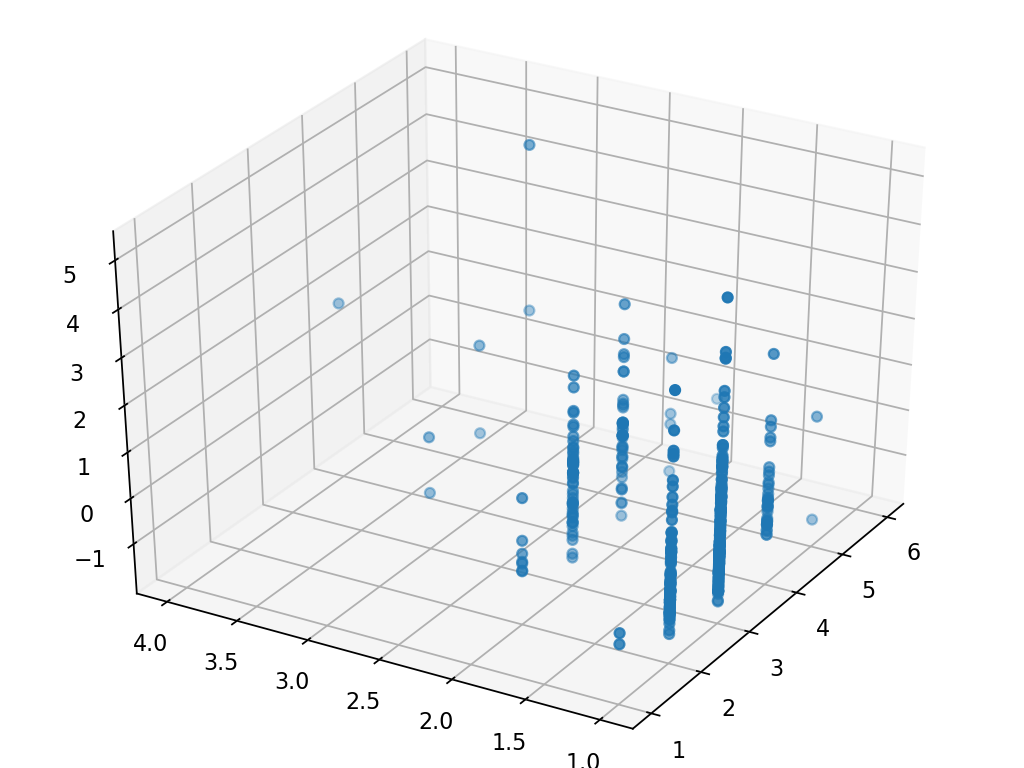

In [173]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(l,b,p)
plt.show()

In [174]:
#3D plot of J with respect to Beta and theta_0

In [178]:
model = LinearRegression()
modelfit(X_train,y_train)

NameError: name 'LinearRegression' is not defined

In [179]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [180]:
model=LinearRegression()

In [181]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
y_train_hat_new = model.predict(X_train)

In [183]:
y_train_hat[:5]

array([[-0.44734415],
       [-1.06755685],
       [-0.87987698],
       [-0.92796042],
       [-0.44660896]])

In [184]:
y_train_hat_new[:5]

array([[-0.48146853],
       [-1.06722997],
       [-0.90929554],
       [-0.9330624 ],
       [-0.45855815]])

In [186]:
model.coef_

array([[ 0.28119486,  0.11383883,  0.47762781, -0.19366503, -0.23678562,
        -0.1881092 , -0.43305639, -0.46298237,  0.16788773, -0.3643899 ,
         0.40429513, -0.36062898,  0.10867439, -0.15234054]])

In [187]:
model.intercept_

array([0.47188163])